Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\vladk\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Epoch 1/10


C:\Users\vladk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8204 - loss: 0.4940 - val_accuracy: 0.8627 - val_loss: 0.3768
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8807 - loss: 0.3259 - val_accuracy: 0.8860 - val_loss: 0.3158
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8989 - loss: 0.2754 - val_accuracy: 0.8941 - val_loss: 0.2969
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9099 - loss: 0.2467 - val_accuracy: 0.8950 - val_loss: 0.2928
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9189 - loss: 0.2183 - val_accuracy: 0.9048 - val_loss: 0.2615
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9258 - loss: 0.2006 - val_accuracy: 0.9028 - val_loss: 0.2672
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9335 - loss: 0.1798 - val_accuracy: 0.9065 - val_loss: 0.2551
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9403 - loss: 0.1615 - val_accuracy: 0.9178 - val

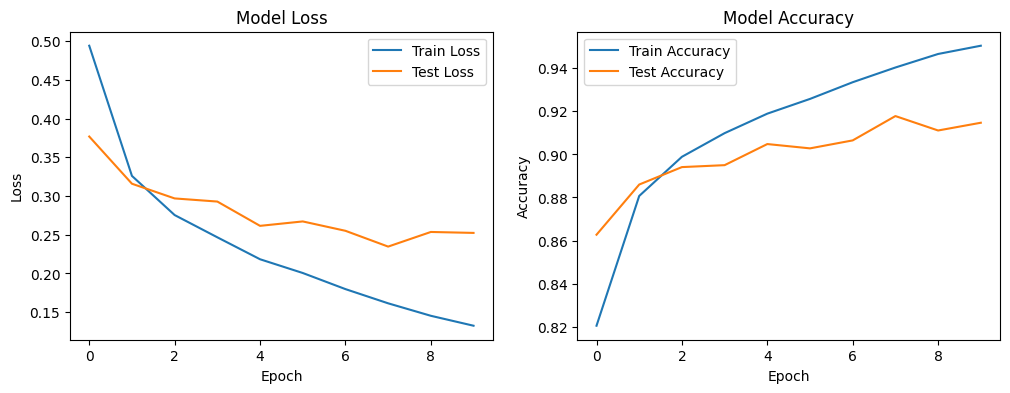

In [1]:
%pip install tensorflow numpy matplotlib

# Import necessary libraries
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# 1. Realization of the model
# a. Load and preprocess data
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# b. Normalize features (scale pixel values to [0, 1])
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape data for CNN (add channel dimension)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Convert labels to categorical
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# c. Develop model architecture with convolutional layers
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# e. Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 2. Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64,
                    validation_data=(x_test, y_test))

# 3. Calculate quality metrics
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

# 4. Plot graphs
# a. Loss on train/test
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# b. Accuracy on train/test
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 5. Evaluate overfitting and apply Dropout
if max(history.history['val_accuracy']) - max(history.history['accuracy']) < -0.1:
    model_with_dropout = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    
    model_with_dropout.compile(optimizer='adam',
                              loss='categorical_crossentropy',
                              metrics=['accuracy'])
    
    history_dropout = model_with_dropout.fit(x_train, y_train, epochs=10, batch_size=64,
                                           validation_data=(x_test, y_test))
    
    # Plot loss with Dropout
    plt.figure(figsize=(6, 4))
    plt.plot(history_dropout.history['loss'], label='Train Loss')
    plt.plot(history_dropout.history['val_loss'], label='Test Loss')
    plt.title('Model Loss with Dropout')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()